> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate 'No show Appointments' Dataset

## Table of Contents
<ul>
    <li><a href="#intro">Introduction to the Project</a></li>
    <li><a href="#QuestionsToAnswer">Questions to Answer</a></li>
    <li><a href="#Dataset">Dataset</a></li>
    <li><a href="#wrangling">Data Wrangling/cleaning</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction To the Project

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In this Project, we try extract any useful information about each appointment and visualize our findings in a manner than is easy to follow in order to help us better understand the factors that affect people's show/no-show rate.

The reason for choosing this project is an interest in discovering what other factors contribute to a phenomenon like Not showing up to an appointment someone scheduled for himself.Especially, medical appointments.

<font color = 'green'>Libraries used:</font> <font color ='brown'>Pandas, Numpy, Matplotlib and Seaborn.</font>

<a id ='QuestionsToAnswer'></a>
## Questions To Answer

#### 1.showing visual representations of the categorical data columns <br>
#### 2.which property matters the most when it comes to showing/not-showing up to appoinments ?
####    (Age, Neighbourhood, Scholarship, SMS) <br>
#### 3.which illness matters the most when it comes to showing/non-showing up to appoinments ?
####    (Hypertension, Diabetes, Handicapped, Alcoholism) <br>
#### 4.does the date of 'SheduledDay' or 'AppoinmentDay' have any Effect on show-up rate?
#### 5.does the difference between 'ScheduledDay' and 'AppointmentDay' Effect show-up rate ?



<a id ='Dataset'></a>
## Dataset

we will be investigating the dataset 'noshowappointments-kagglev2-may-2016.csv' from Kaggle. - <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv">link</a>

This dataset contains data about each appointment's date(s), and weither or not they recieved SMS.Futhermore, It contians the Patient's Gender, Age and Diagnosis.

<font color = 'brown'>Columns: </font><br>
<ul>
    <li>PatientId<br>
    <li>AppointmentID<br>
    <li>Gender<br>
    <li>ScheduledDay<br>
    <li>AppointmentDay<br>
    <li>Age<br>
    <li>Neighbourhood<br>
    <li>Scholarship<br>
    <li>Hipertension<br>
    <li>Diabetes<br>
    <li>Alcoholism<br>
    <li>Handcap<br>
    <li>SMS_received<br>
    <li>No-show<br>
</ul>

In [2]:
#importing all the libraries used
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as pld
from datetime import datetime
import seaborn as sns

#display plots inline (in the notebook)
%matplotlib inline 

sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2) #change default plot size and font scale for a better look

<a id='wrangling'></a>
## Data Wrangling / Cleaning


### reading the data

In [23]:
df = pd.read_csv("datasets/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### General Info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [26]:
df.duplicated().any()

False

<font color = 'blue'>There seems to be no null values and no duplicate rows</font>

### Inspecting the keys:

In [27]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

<font color = 'blue'> 'Hypertension' and 'Handicapped' are miss-spelled

In [28]:
df.rename(columns={"Hipertension":"Hypertension","Handcap":"Handicapped"},inplace=True)

### Ispecting the values:

In [29]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No-show'],
      dtype='object')

In [30]:
df.Gender.unique() #Nothing wrong here, moving on...

array(['F', 'M'], dtype=object)

<font color = 'blue'>'ScheduledDay' and 'AppointmentDay' are datetime, need to be parsed from string.

In [31]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [32]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [33]:
df.Neighbourhood.unique() #Nothing wrong...

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

<font color = 'blue'> avoiding '-' symbol for eaise of operations (ex: df.No_show instead of df['No-show'])

In [34]:
df.rename(columns={'No-show':'No_show'},inplace=True)

### Data Cleaning/Wrangling final note:
Not a lot of changes had to be done to the data, thankfully there were no missing/duplicate values to fix. changed some column names and fixed some miss-spelling.

### after cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicapped     110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Saving Data

In [36]:
df.to_csv("datasets/cleanv1_noshowappointments.csv",index=False) #saving

In [3]:
df = pd.read_csv("datasets/cleanv1_noshowappointments.csv")

#parse datetime
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1: 1.showing visual representations of the categorical data columns 

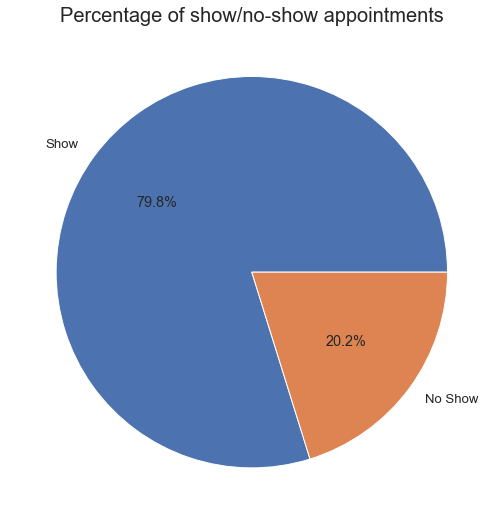

In [5]:
plt.pie(df.No_show.value_counts(),labels=['Show','No Show'],autopct='%.1f%%')
plt.title("Percentage of show/no-show appointments",fontsize=20);

In [40]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

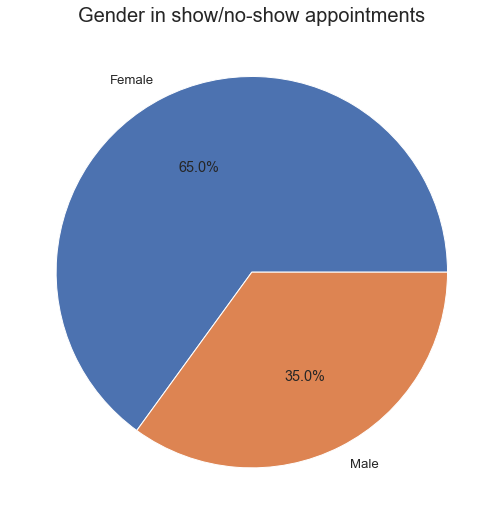

In [41]:
plt.pie(df.Gender.value_counts(),labels=['Female','Male'],autopct='%.1f%%')
plt.title("Gender in show/no-show appointments",fontsize=20);

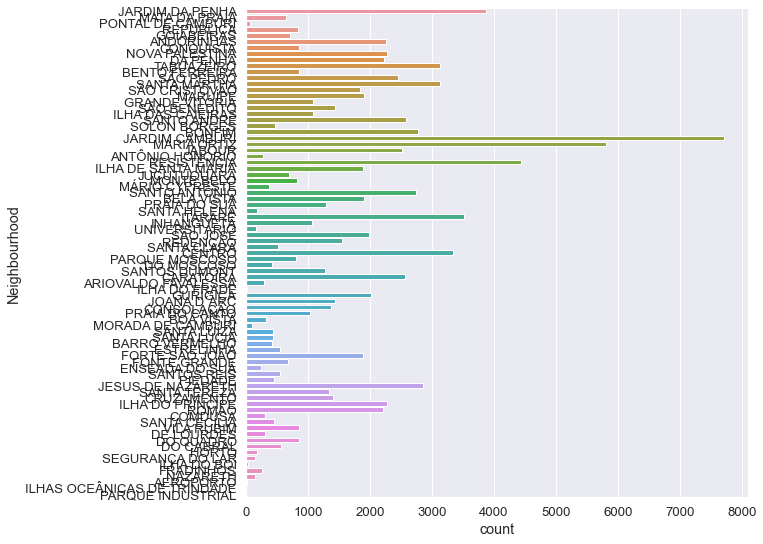

In [42]:
sns.countplot(y='Neighbourhood',data =df);

<font color = 'red'>there are too many Neighbourhoods to just plot normally</font>

In [70]:
df.Neighbourhood.nunique()

81

<font color = 'blue'> There are 81 different Neighbourhoods. so lets plot only the top 10</font>

In [111]:
top_10_Neighbourhood = df.Neighbourhood.value_counts()
top_10_Neighbourhood_labels = list(top_10_Neighbourhood[:10].keys())
top_10_Neighbourhood_labels.append("OTHERS")
top_10_Neighbourhood_values = list(top_10_Neighbourhood[:10].values)
top_10_Neighbourhood_values.append(top_10_Neighbourhood[10:].sum())

In [126]:
print(top_10_Neighbourhood_labels)

['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA', 'ITARARÉ', 'CENTRO', 'TABUAZEIRO', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM', 'OTHERS']


In [127]:
print(top_10_Neighbourhood_values)

[7717, 5805, 4431, 3877, 3514, 3334, 3132, 3131, 2853, 2773, 69960]


In [115]:
sum(top_10_Neighbourhood_values)

110527

In [117]:
df.Neighbourhood.count()

110527

Text(0.5, 1.0, 'Top 10 Neighbourhoods')

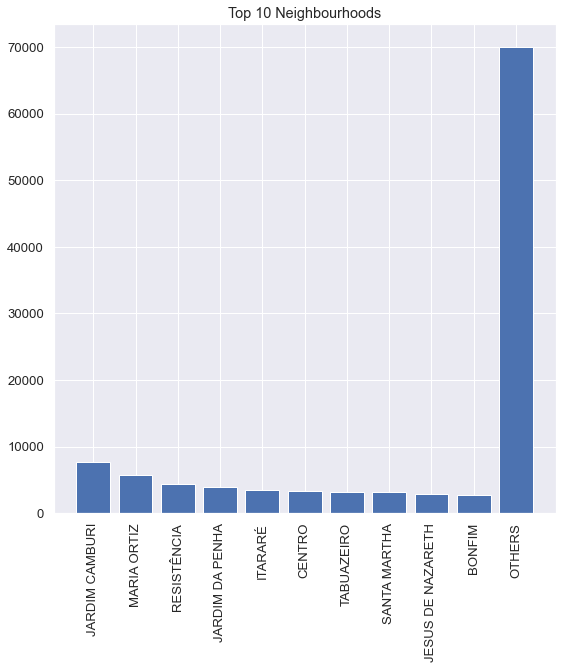

In [128]:
plt.bar(top_10_Neighbourhood_labels,top_10_Neighbourhood_values)
plt.xticks(rotation = 90);
plt.title("Top 10 Neighbourhoods")

In [132]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

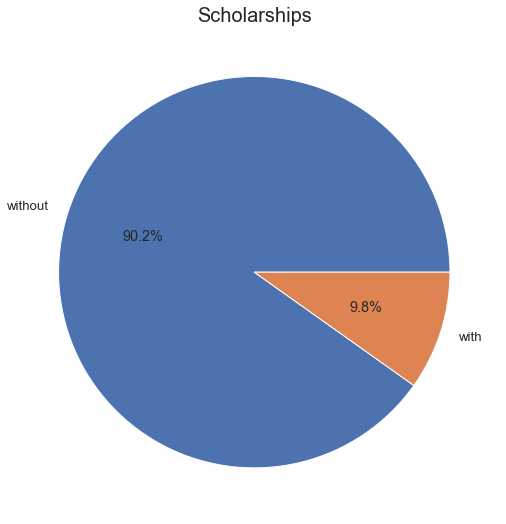

In [134]:
plt.pie(df.Scholarship.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Scholarships",fontsize=20);

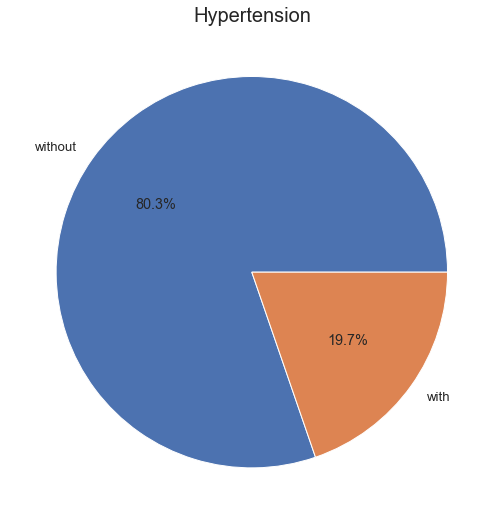

In [136]:
plt.pie(df.Hypertension.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Hypertension",fontsize=20);

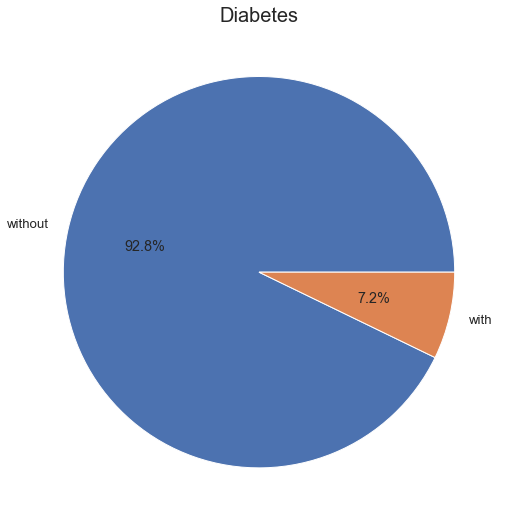

In [137]:
plt.pie(df.Diabetes.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Diabetes",fontsize=20);

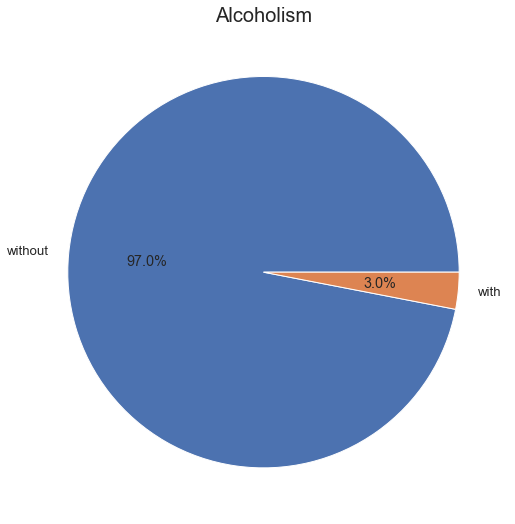

In [138]:
plt.pie(df.Alcoholism.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Alcoholism",fontsize=20);

In [143]:
handicapped = df.Handicapped.value_counts()
normal = handicapped.values[0]
non_normal = handicapped.values[1:].sum()

In [149]:
[normal,non_normal] #test

[108286, 2241]

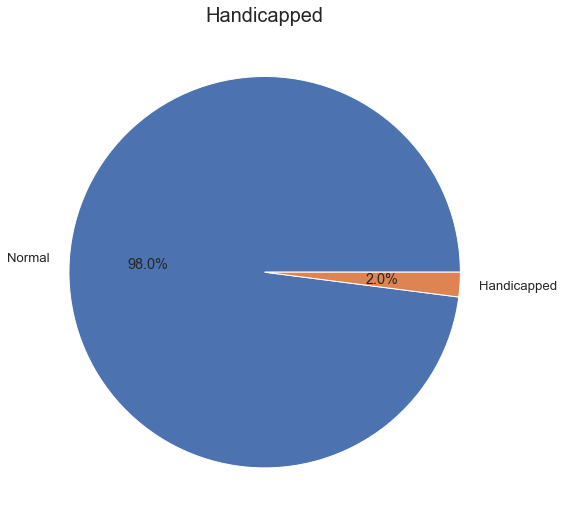

In [144]:
plt.pie([normal,non_normal],labels=['Normal','Handicapped'],autopct='%.1f%%')
plt.title("Handicapped",fontsize=20);

<font color = 'blue'> For the Column 'Handicapped', only 2% of data is handicapped, and they're split up into 4 different levels</font>

In [145]:
handicap_level_lables = ['Level 1','Level 2','Level 3','Level 4']
handicap_level_values = list(handicapped.values[1:])

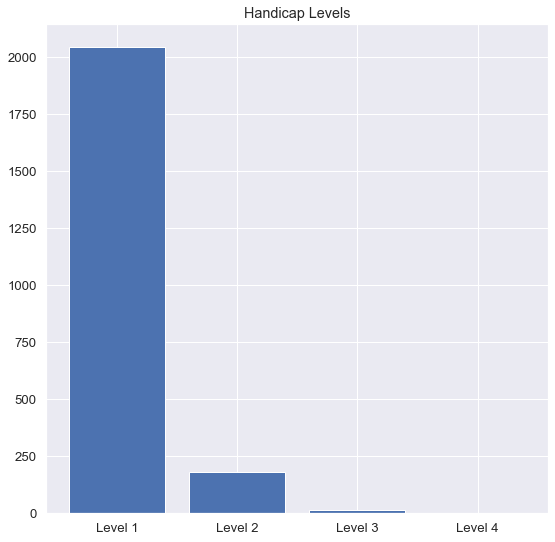

In [153]:
plt.bar(handicap_level_lables,handicap_level_values)
plt.title("Handicap Levels");

<font color = 'blue'> the majority of handicapped patients are of type 'level 1'</font>

In [156]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

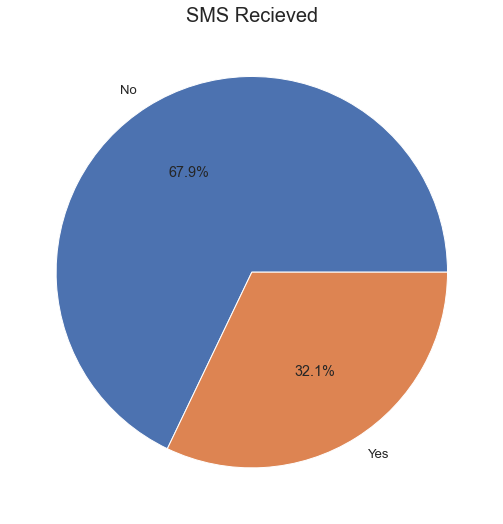

In [155]:
plt.pie(df.SMS_received.value_counts(),labels=['No','Yes'],autopct='%.1f%%')
plt.title("SMS Recieved",fontsize=20);

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>Showing up:	79% Show, 21% No Show
    <li>Gender:	65% Female, 35% Male
    <li>Neighbourhood: 81 different Neighbourhoods, Data almost evenly distributed. Hinting that this Data might be from a large clinc where people come from different Neighbourhoods instead of a local clinic that only has patients from nearby areas
    <li>Scholarships: around 10% have Scholarships
    <li>Hypertension: around 20% have Hypertension
    <li>Diabetesaround 7% are diabetic 
    <li>Alcoholism: 3% of the data
    <li>Handicapped: only 2% of data is handicapped, and they're split up into 4 different levels and the majority of handicapped patients are of type 'level 1'
    <li>SMS: around 32% recieved SMS
</ul>

### Q2: 2.which property matters the most when it comes to showing/not-showing up to appoinments ?

In [158]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

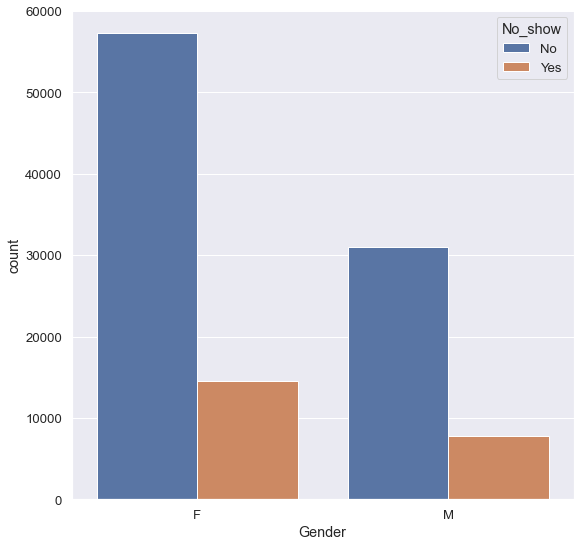

In [163]:
sns.countplot(x='Gender',hue ='No_show',data=df);

<font color = 'brown'>Nothing to conclude..</font>

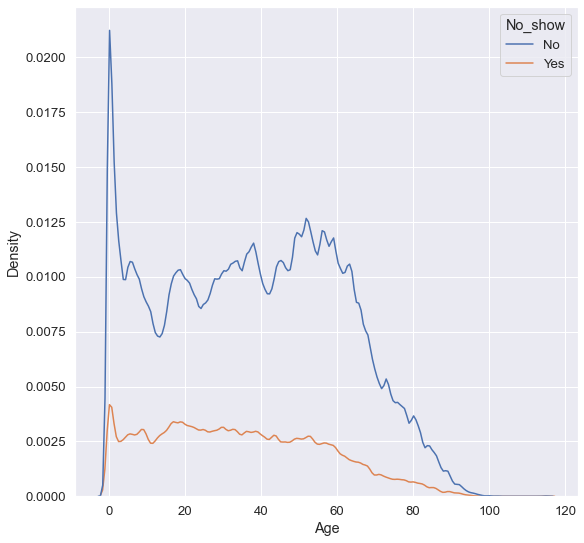

In [174]:
sns.kdeplot(x='Age',hue ='No_show',data=df,bw_adjust=0.25);

<font color = 'blue'> Nothing to conclude. However, a large amount of the data has an empty age column (=0)</font> 

<font color = 'green'> This points that a lot of patients have undocumented ages, which will hurt the validity of any conclusions we take based on the age of the patients. Recommended that we report back to the client that there is a data gathering problem with 'age' category. However, these columns will not be dropped as the rest of the data in them seems to be of real patients... </font>

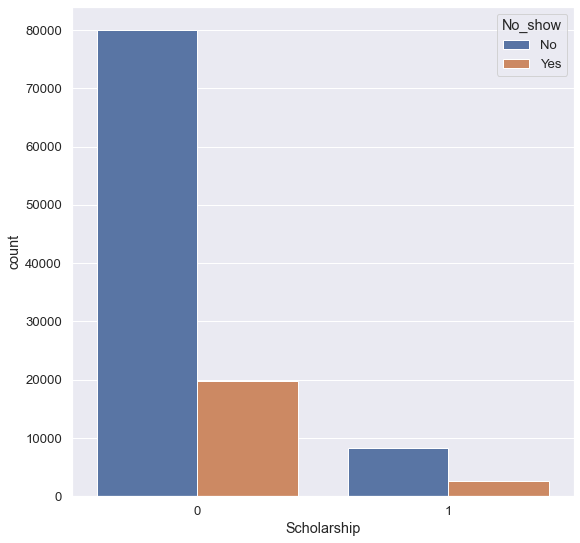

In [65]:
sns.countplot(x='Scholarship',hue ='No_show',data=df);

<font color = 'blue'> a lot patients that don't have a Schlarship tend to not show. lets check the ratios...</font>

In [66]:
scholarship = df.groupby(['No_show','Scholarship'])['PatientId'].count()
scholarship

No_show  Scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
Name: PatientId, dtype: int64

In [79]:
no_show_scholarship = scholarship[2] / (scholarship[0] + scholarship[2])
print(" No Show  Scholarship: ",no_show_scholarship)

no_show_no_scholarship = scholarship[3] / (scholarship[1] + scholarship[3])
print(" No Show No Scholarship: ",no_show_no_scholarship)

 No Show  Scholarship:  0.19807155900708365
 No Show No Scholarship:  0.2373630420771568


<font color = 'brown'>slight decrease in people with scholarships that don't show up (%4)... but not enough to be relevant. nothing to conclude...</font>

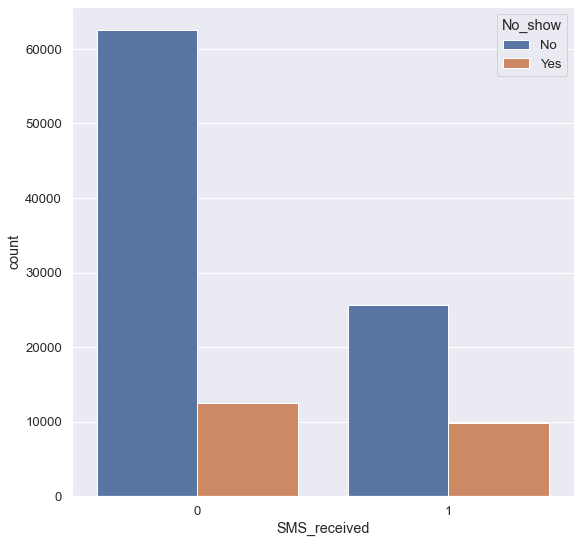

In [68]:
sns.countplot(x='SMS_received',hue ='No_show',data=df);

<font color = 'blue'>The number of people that have not received an 'SMS' and not showed is large. Promising, lets check the ratios</font>

In [7]:
SMS = df.groupby(['No_show','SMS_received'])['PatientId'].count()
SMS

No_show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: PatientId, dtype: int64

In [8]:
no_show_SMS = SMS[2] / (SMS[0] + SMS[2])
print(" No Show SMS: ",no_show_SMS)

no_show_no_SMS = SMS[3] / (SMS[1] + SMS[3])
print(" No Show No SMS: ",no_show_no_SMS)

 No Show SMS:  0.16703311346525418
 No Show No SMS:  0.27574544839637


<font color = 'green'>The number of people that don't show up when they dont recieve an SMS is 11% higher than the people that don't show after getting the SMS. This may suggest that a lot of people remember the appointment only when they recieve the SMS.</font> 

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>a lot of patients have undocumented ages (age equals zero)
    <li>increase in the people with scholarships that don't show up over people that don't showup without a scholarship. (%4)
    <li>'No_show' patients when they dont recieve an SMS is higher than the patients that don't show after getting the SMS. (11%)
</ul>

a lot of patients have undocumented ages, which will hurt the validity of any conclusions we take based on the age of the patients. Recommended that we report back to the client that there is a data gathering problem with 'age' category. Also, there is a slight increase  in people with scholarships that don't show up. Furthermore, The number of people that don't show up when they dont recieve an SMS is higher than the people that don't show after getting the SMS. This may suggest that a lot of people remember the appointment only when they recieve the SMS.

### Q3: which illness matters the most when it comes to showing/non-showing up to appoinments ?

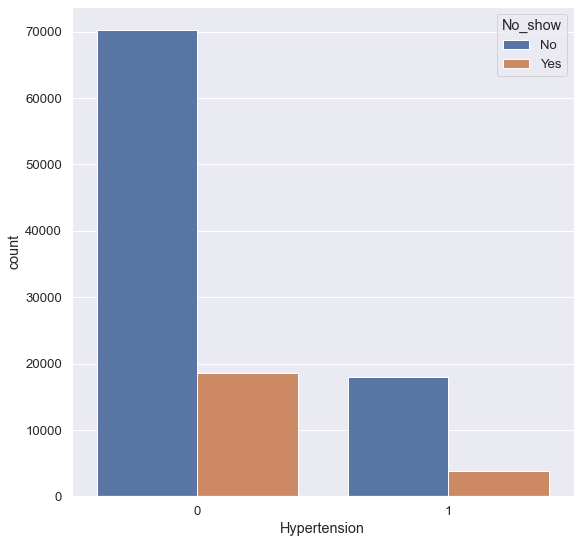

In [72]:
sns.countplot(x='Hypertension',hue ='No_show',data=df);

<font color = 'blue'>Large Spike in 'Hypertension' and 'No_show'...</font>

In [10]:
Hyperten = df.groupby(['No_show','Hypertension'])['PatientId'].count()
Hyperten

No_show  Hypertension
No       0               70179
         1               18029
Yes      0               18547
         1                3772
Name: PatientId, dtype: int64

In [11]:
no_show_Hyperten = Hyperten[2] / (Hyperten[0] + Hyperten[2])
print(" No Show Hypertension: ",no_show_Hyperten)

no_show_no_Hyperten = Hyperten[3] / (Hyperten[1] + Hyperten[3])
print(" No Show No Hypertension: ",no_show_no_Hyperten)

 No Show Hypertension:  0.20903680995424115
 No Show No Hypertension:  0.17301958625751113


<font color = 'brown'>slight 'showing' increase in people that have hypertension over people that don't.</font>

In [13]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

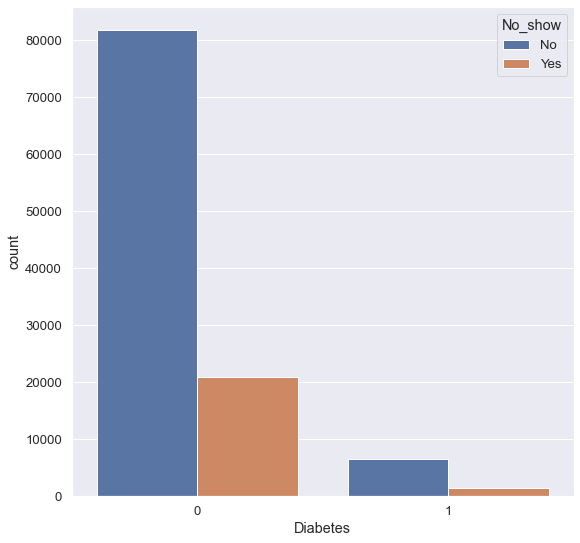

In [17]:
sns.countplot(x='Diabetes',hue ='No_show',data=df);

In [3]:
Dia = df.groupby(['No_show','Diabetes'])['PatientId'].count()
Dia

No_show  Diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
Name: PatientId, dtype: int64

In [4]:
no_show_Dia = Dia[2] / (Dia[0] + Dia[2])
print(" No Show Diabetes: ",no_show_Dia)

no_show_no_Dia = Dia[3] / (Dia[1] + Dia[3])
print(" No Show No Diabetes: ",no_show_no_Dia)

 No Show Diabetes:  0.20362824612025268
 No Show No Diabetes:  0.18003273322422259


<font color = 'brown'>slight 'showing' increase in people that have Diabetes over people that don't.</font>

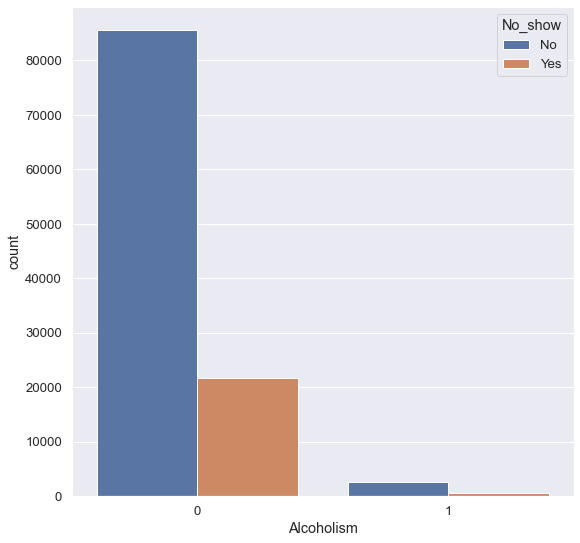

In [7]:
sns.countplot(x='Alcoholism',hue ='No_show',data=df);

In [5]:
alc = df.groupby(['No_show','Alcoholism'])['PatientId'].count()
alc

No_show  Alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
Name: PatientId, dtype: int64

In [6]:
no_show_Alc = alc[2] / (alc[0] + alc[2])
print(" No Show Alcoholism" , no_show_Alc)

no_show_no_alc = alc[3] / (alc[1] + alc[3])
print(" No Show No Alocoholism", no_show_no_alc)

 No Show Alcoholism 0.20194649472318904
 No Show No Alocoholism 0.20148809523809524


<font color = 'brown'> Nothing to conclude</font>

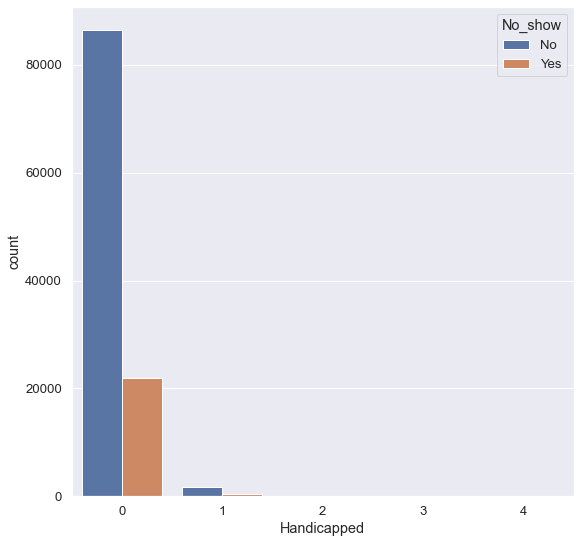

In [8]:
sns.countplot(x='Handicapped',hue ='No_show',data=df);

In [9]:
hand = df.groupby(['No_show','Handicapped'])['PatientId'].count()
hand

No_show  Handicapped
No       0              86374
         1               1676
         2                146
         3                 10
         4                  2
Yes      0              21912
         1                366
         2                 37
         3                  3
         4                  1
Name: PatientId, dtype: int64

In [10]:
hand[5]

21912

In [17]:
no_show_hand = hand[0] / ( hand[0] + hand[5] )
print("No show handicapped : ",no_show_hand)

no_show_no_hand = np.sum(hand[[1,2,3,4]]) / ( np.sum(hand[[1,2,3,4]]) + np.sum(hand[[6,7,8,9]]) )
print("No show No handicapped", no_show_no_hand)

No show handicapped :  0.7976469719077258
No show No handicapped 0.818384649709951


<font color = 'brown'>Nothing to conclude</font>

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>increase in 'showing' people that don't have Hypertension, Diabetes, Alcoholism or are Handicapped over all other cateogires.
</ul>

Almost all the graphs showed that the category (Healthy/Showed up) are the most prevelant in the data. However, apon further inspection, almost all ilnesses appear to not have an impact on a patient's showing-up status.

### Q4: does the date of 'SheduledDay' or 'AppoinmentDay' have any Effect on show-up rate?

In [5]:
showed_up = df[df['No_show'] == 'No']
no_show_up = df[df['No_show'] == 'Yes']

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df['AppointmentDayName'] = df['AppointmentDay'].dt.day_name()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show,AppointmentDayName
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


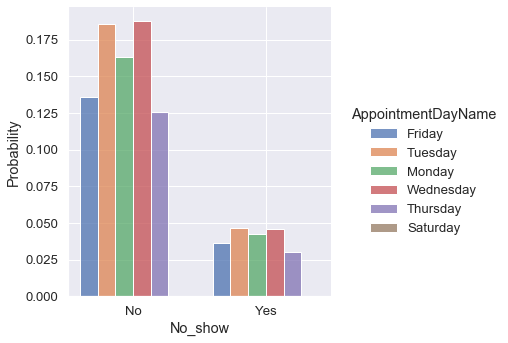

In [30]:
sns.displot(data = df, x = 'No_show', hue = 'AppointmentDayName', common_norm = True, stat = 'probability', multiple = 'dodge', shrink = 0.8);

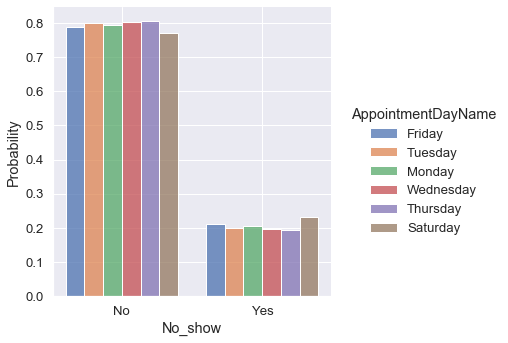

In [33]:
sns.displot(data = df, x = 'No_show', hue = 'AppointmentDayName', common_norm = False, stat = 'probability', multiple = 'dodge', shrink = 0.8);

<font color = 'blue'> no show on saturday is higher than the rest of the days</font>

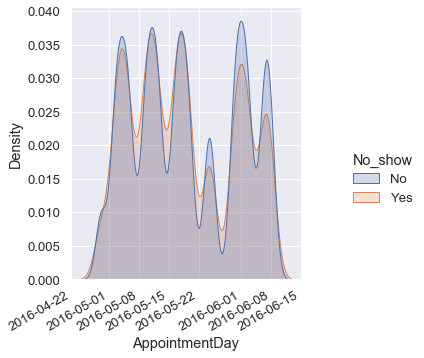

In [38]:
g = sns.displot(data = df, x = 'AppointmentDay', kind = 'kde', hue = 'No_show', common_norm = False, fill = True)
g.figure.autofmt_xdate()

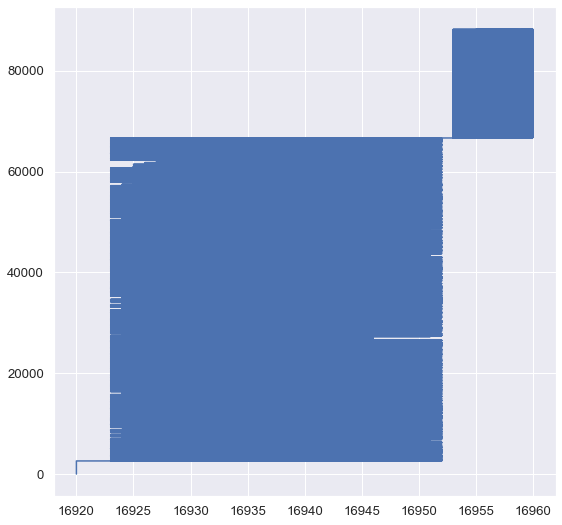

In [40]:
x_values = showed_up['AppointmentDay']
dates = pld.date2num(x_values)

y_values =[i+random.gauss(0,1) for i,_ in enumerate(dates)]
plt.plot(dates,y_values)

# plt.xlim(datetime(2016,[4 6],[7 29]))

SyntaxError: invalid syntax (<ipython-input-38-afda82efcad8>, line 1)

### Q5: does the difference between 'ScheduledDay' and 'AppointmentDay' Effect show-up rate ?

In [40]:
def difference_in_days(row):
    difference_in_days = row['AppointmentDay'] - row['ScheduledDay']
    difference_in_days = difference_in_days.days
    
    if difference_in_days <= 0:
        return np.nan
    else:
        return difference_in_days
    
df['difference_in_days'] = df.apply(difference_in_days, axis = 1)
df['difference_in_days']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
110522    34.0
110523    34.0
110524    40.0
110525    40.0
110526    40.0
Name: difference_in_days, Length: 110527, dtype: float64

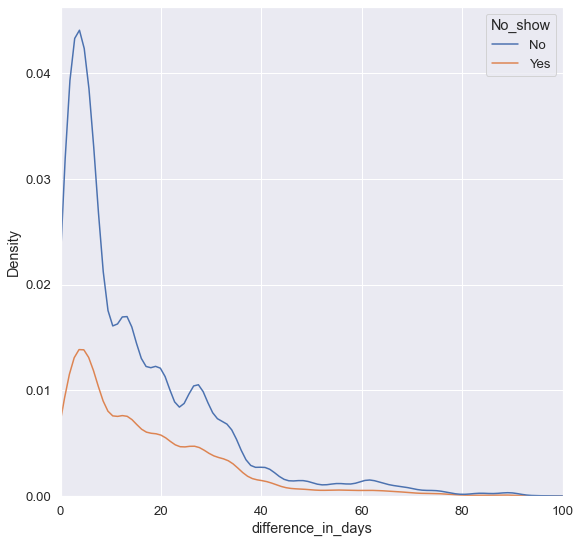

In [45]:
sns.kdeplot(x='difference_in_days',hue='No_show',data=df)
plt.xlim([0,100]);

<font color = 'brown'>Aside from the fact that the dataset contains way more people that 'show up'. the difference in days has no apparent affect on show up rate.</font>

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!